## Invert using invert Class

In [1]:
import matplotlib.pyplot as plt
from invert_c_theta import Invert
import pandas as pd
import firedrake 
import os

Reading outline from icepack database


### Coarsest_2 resolution (cells = 6048) Invert using C and theta both (new Compute C function and log C)

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig_coarsest_2_pw', reg_constant_c = 5, reg_constant_theta = 5, read_mesh = True, drichlet_ids = [0])

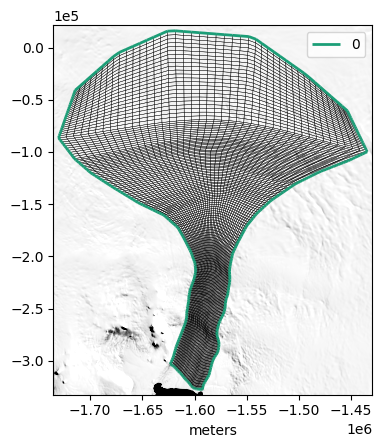

In [3]:
invert_pig.plot_mesh()

In [4]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

In [5]:
invert_pig.invert_C_theta_alternate(max_iterations=2, per_variable_iteration = 100)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.385712e+05   1.073579e+01                  2.091505e+04   
  1     2.679838e+04   1.509639e+00   2.091505e+04   2.091505e+04   3         2         0         2         2         
  2     2.679838e+04   1.509639e+00   2.091505e+04   1.307191e+03   4         2         2         2         2         
  3     2.502423e+04   1.234216e+00   1.307191e+03   3.267977e+03   5         3         0         1         3         
  4     2.193281e+04   8.385361e-01   3.267977e+03   8.169942e+03   6         4         0         1         3         
  5     1.895636e+04   6.624122e-01   8.169942e+03   8.169942e+03   7         5         0         1         3         
  6     1.619021e+04   1.437295e+00   8.169942e+03   8.169942e+03   8         6         0         1         3         
  7     1.445181e+04   7.497223e-01   8.169942e+03   8.169942e+0

In [6]:
u_optimized = invert_pig.simulation()

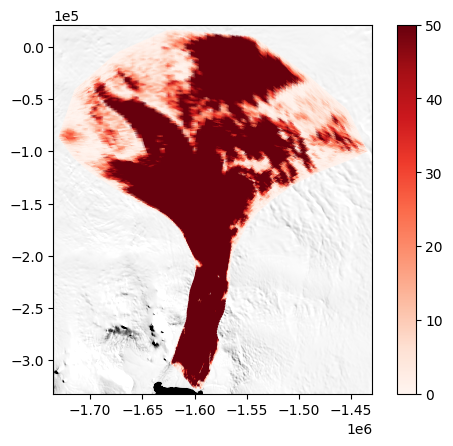

In [7]:
invert_pig.plot_u_error(u_optimized, vmax = 50)

In [8]:
firedrake.assemble(invert_pig.loss_functional(u_optimized))

2357.9643684160974

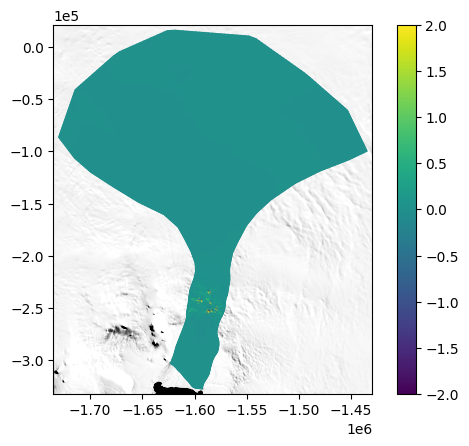

In [9]:
invert_pig.plot_C()

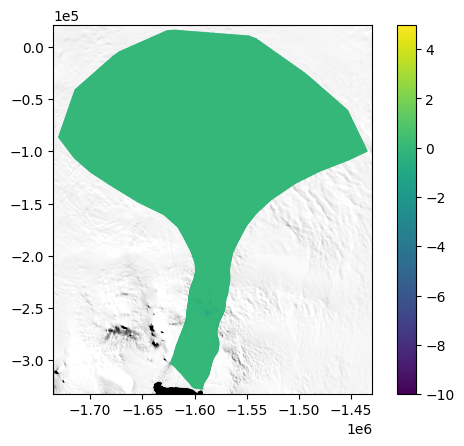

In [10]:
invert_pig.plot_theta()

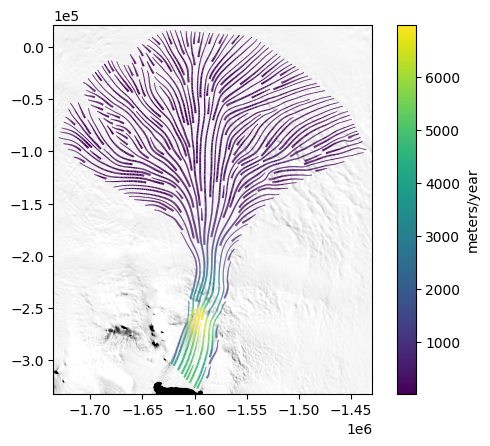

In [11]:
invert_pig.plot_streamline_u(u_optimized)

#### Save all this

In [12]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [29]:
df = invert_pig.get_dataframe(u_optimized)

In [30]:
df.to_csv('new_compute_C_theta_C_optimized.csv')

#### Simultaneous theta C optimization

In [2]:
invert_pig = Invert(outline = 'pine-island', mesh_name = 'pig_coarsest_2_pw', reg_constant_c = 5, reg_constant_theta = 5, read_mesh = True, drichlet_ids = [0])

Reading outline from icepack database


In [3]:
folder_path = "completed/16/"

# Get file names starting with 'ASE'
file_names = [file for file in os.listdir(folder_path) if file.startswith('ASE')]

name = file_names[-1][:40]
invert_pig.import_velocity_data(folder_path+name, modified_exists = True)

Reading velocity from specified file


In [4]:
invert_pig.invert_C_theta_simultaneously(max_iterations=100)


Truncated CG Trust-Region Solver
  iter  value          gnorm          snorm          delta          #fval     #grad     tr_flag   iterCG    flagCG    
  0     1.385712e+05   1.239145e+01                  1.411692e+04   
  1     3.234053e+04   4.510420e+00   1.411692e+04   3.529229e+04   3         2         0         2         2         
  2     3.234053e+04   4.510420e+00   3.529229e+04   2.205768e+03   4         2         2         1         2         
  3     2.289663e+04   3.821910e+00   2.205768e+03   5.514420e+03   5         3         0         1         2         
  4     1.662847e+04   5.943022e-01   5.514420e+03   5.514420e+03   6         4         0         2         2         
  5     1.519006e+04   4.687475e-01   5.514420e+03   5.514420e+03   7         5         0         1         3         
  6     1.464099e+04   2.065963e+00   5.514420e+03   5.514420e+03   8         6         0         1         3         
  7     1.356481e+04   7.037516e-01   5.514420e+03   5.514420e+0

In [5]:
u_optimized = invert_pig.simulation()

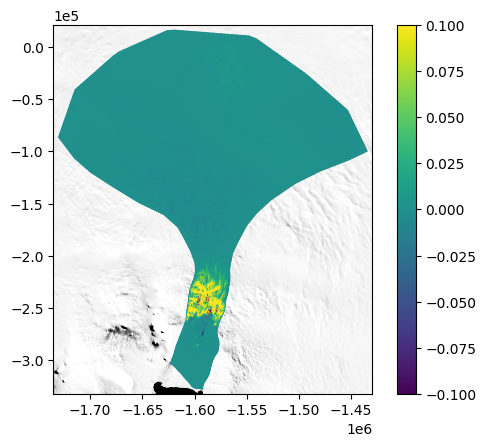

In [6]:
invert_pig.plot_C(vmin = -0.1, vmax = 0.1)

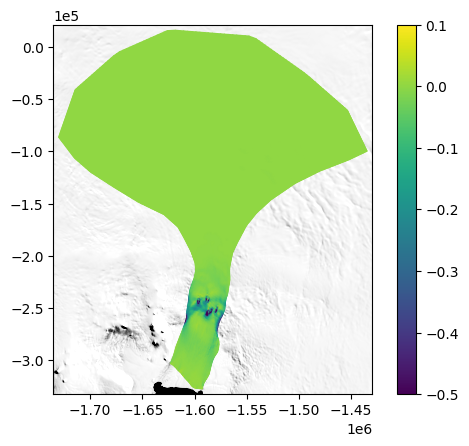

In [7]:
invert_pig.plot_theta(vmin = -0.5, vmax = 0.1)

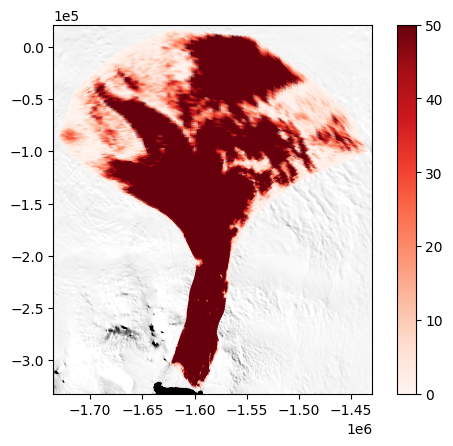

In [8]:
invert_pig.plot_u_error(u_optimized, vmax = 50)

In [9]:
firedrake.assemble(invert_pig.loss_functional(u_optimized))

3231.6352123628976

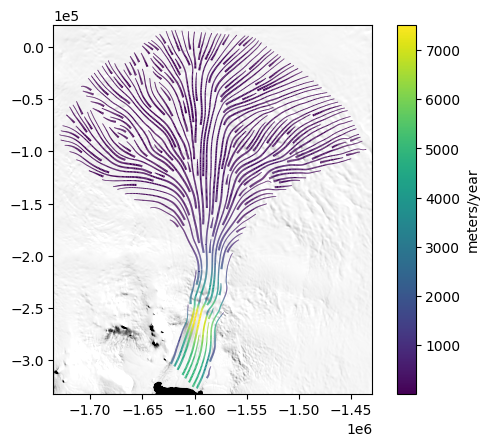

In [10]:
invert_pig.plot_streamline_u(u_optimized)

Save variables

In [27]:
# Save to Checkpoint File
mesh = invert_pig.get_mesh()
theta = invert_pig.get_theta()
C = invert_pig.get_C()
checkpoint_file_path = os.path.join(folder_path, 'new_reg_variables_c5_t5_simultaneous.h5')
with firedrake.CheckpointFile(checkpoint_file_path, 'w') as afile:
    if afile is not None:
        afile.save_mesh(mesh)  # optional
        afile.save_function(u_optimized, name='u_optimized')
        afile.save_function(theta, name='theta')
        afile.save_function(C, name='C')
    else:
        print("Failed to create checkpoint file.")

In [28]:
df = invert_pig.get_dataframe(u_optimized)

In [30]:
df.to_csv('new_compute_C_theta_C_optimized_simultaneous.csv')